# Derived features
In this notebook, we will explore the important features indicated by the [spreadsheet](https://docs.google.com/spreadsheets/d/1bxnc2s3DG-MOfe-sHBF1bNEdQbvXlCkwuSWP7y_xCAo/edit#gid=0) and try to construct the new features as many as possible and explore the details of them.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
import json
warnings.filterwarnings('ignore')

In [2]:
training = "../../data/train.csv"
test = "../../data/test.csv"

In [3]:
df_train = pd.read_csv(training)
df_test = pd.read_csv(test)

In [4]:
def simple_count(column, size):
    fig = plt.figure(figsize=size)
    plt.title("Number of occurences by category "+ column)
    plt.xlabel("Number of occurences")
    plt.ylabel(column)
    df_train[column].value_counts(sort=False,dropna=False).plot.barh()

In [5]:
def simple_violin(column, size):
    fig = plt.figure(figsize=size)
    sns.violinplot(x=column, y="SalePrice", data=df_train, inner="quartile")

In [6]:
def plot_univariate_dist(num, column):
    fig = plt.figure(figsize=(8, 6))
    d = sns.distplot(num[column].dropna(), color='r')
    plt.title("Distribution of " + column)
    plt.ylabel("Number of Occurences")
    plt.xlabel(column)

In [7]:
def plot_univariate_pp(num, column):
    fig = plt.figure(figsize=(8, 8))
    plt.text(x=2, y=1,s="Skewness: %f\n Kurtosis: %f" % (num[column].skew(),
                                                     num[column].kurt()) )

    res = st.probplot(num[column], plot=plt)

In [8]:
# remove outliers
df_train = df_train[df_train.GrLivArea < 4000]
df_train = df_train.drop("Id", axis=1)

## Bathrooms
Let's at first derive the new feautres including total number of bath rooms, total number of half bath rooms.

In [9]:
df_train["totalFullBath"] = df_train["FullBath"] + df_train["BsmtFullBath"]
df_train["totalBaths"] = df_train["totalFullBath"] + 0.5 * df_train["HalfBath"] + 0.5 * df_train["BsmtHalfBath"]

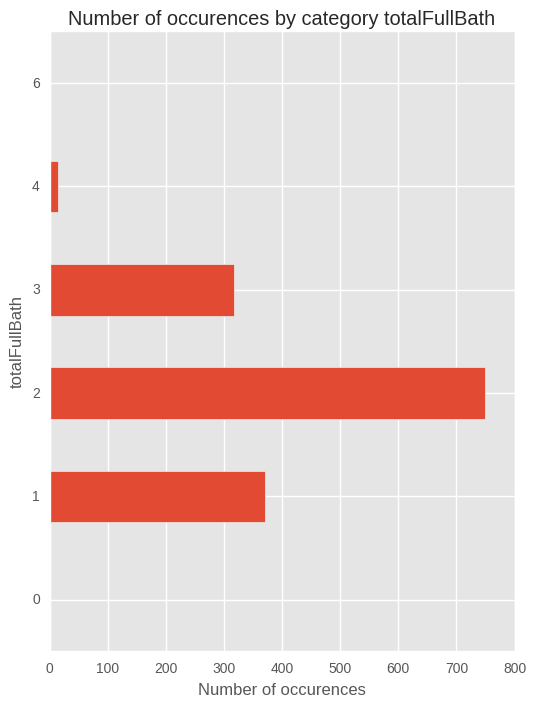

In [10]:
simple_count("totalFullBath", (6,8))

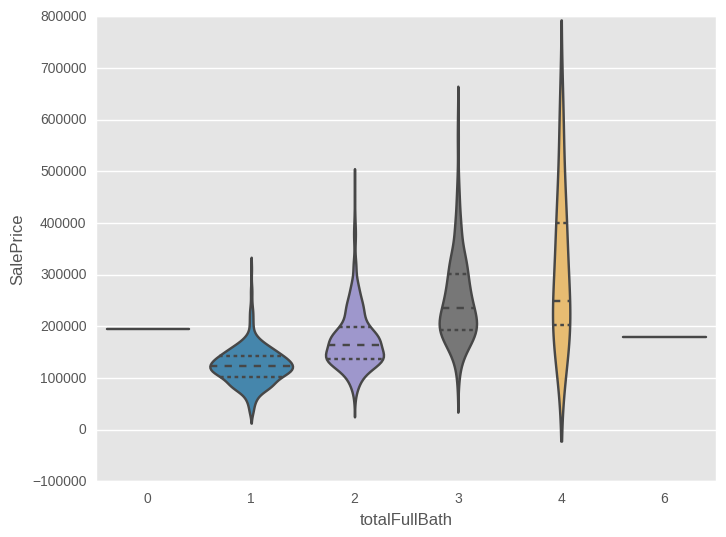

In [11]:
simple_violin("totalFullBath", (8,6))

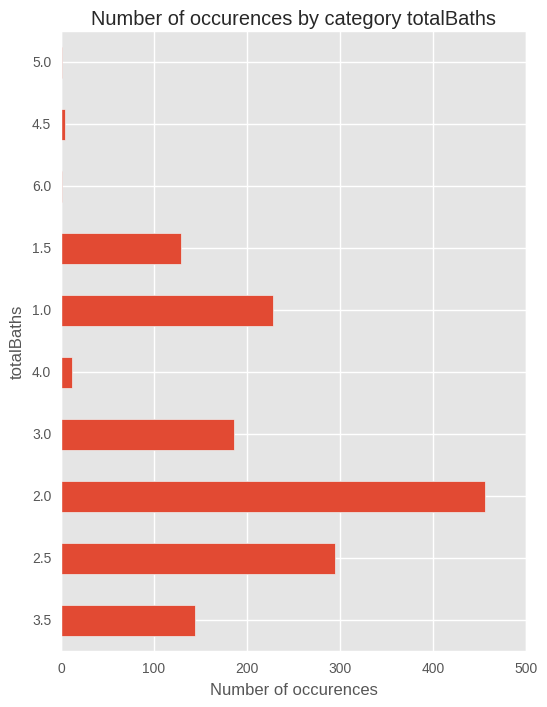

In [12]:
simple_count("totalBaths", (6,8))

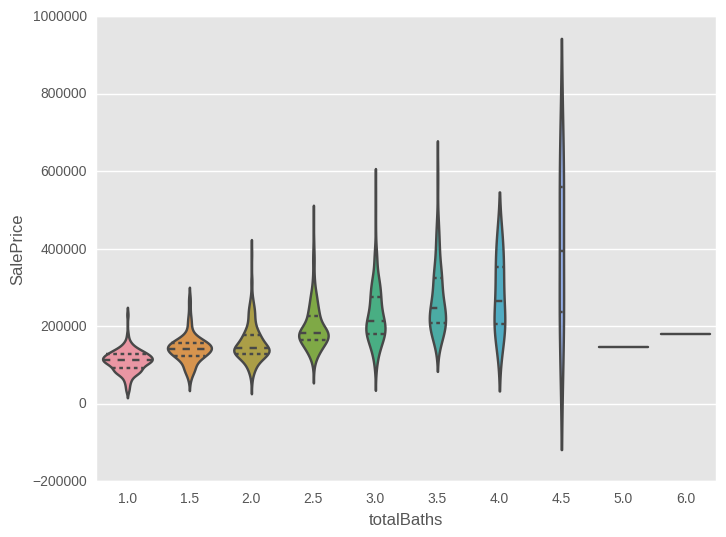

In [13]:
simple_violin("totalBaths", (8,6))

## Total rooms above ground
We only has the total number of rooms above ground without the baths, add them together to have the number of rooms above ground.

In [14]:
df_train["totalRms"] = df_train["TotRmsAbvGrd"] + df_train["FullBath"] + 0.5 * df_train["HalfBath"]

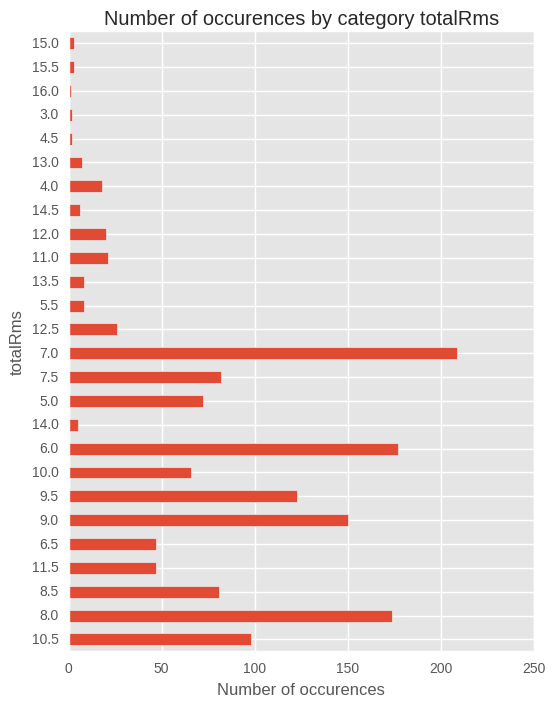

In [15]:
simple_count("totalRms", (6,8))

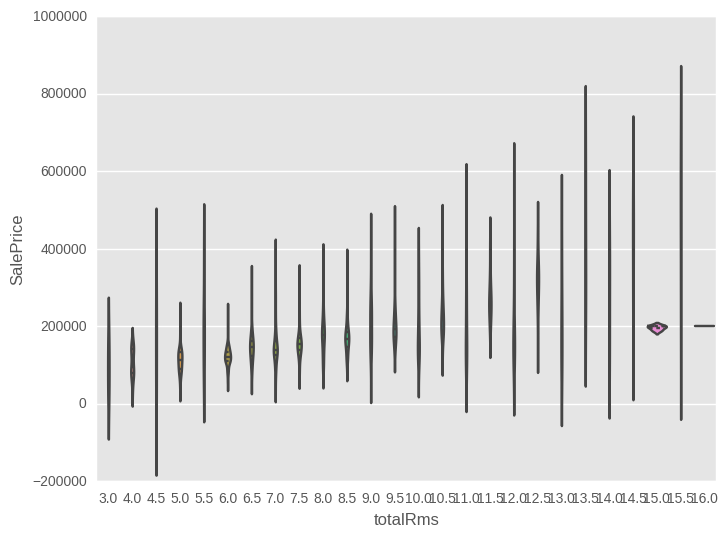

In [16]:
simple_violin("totalRms", (8,6))

## Aging
A new feature can be created to compute the number of years between the Year sold and the Year Remodel.

In [17]:
df_train["Aging"] = df_train["YrSold"] - df_train["YearBuilt"]

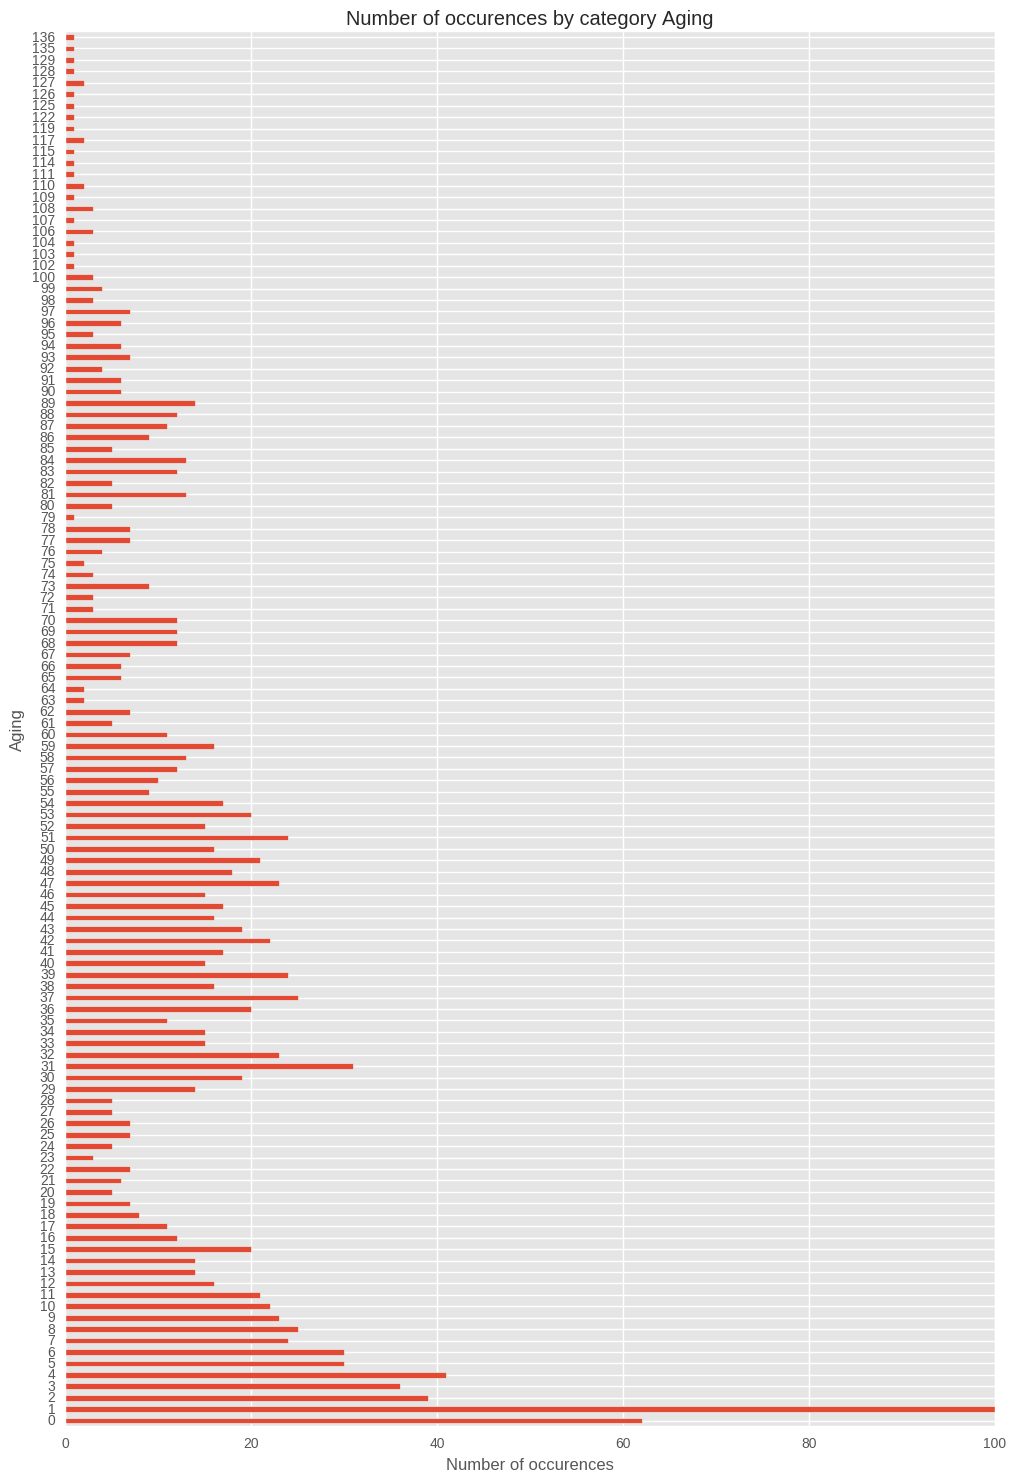

In [18]:
simple_count("Aging", (12,18))

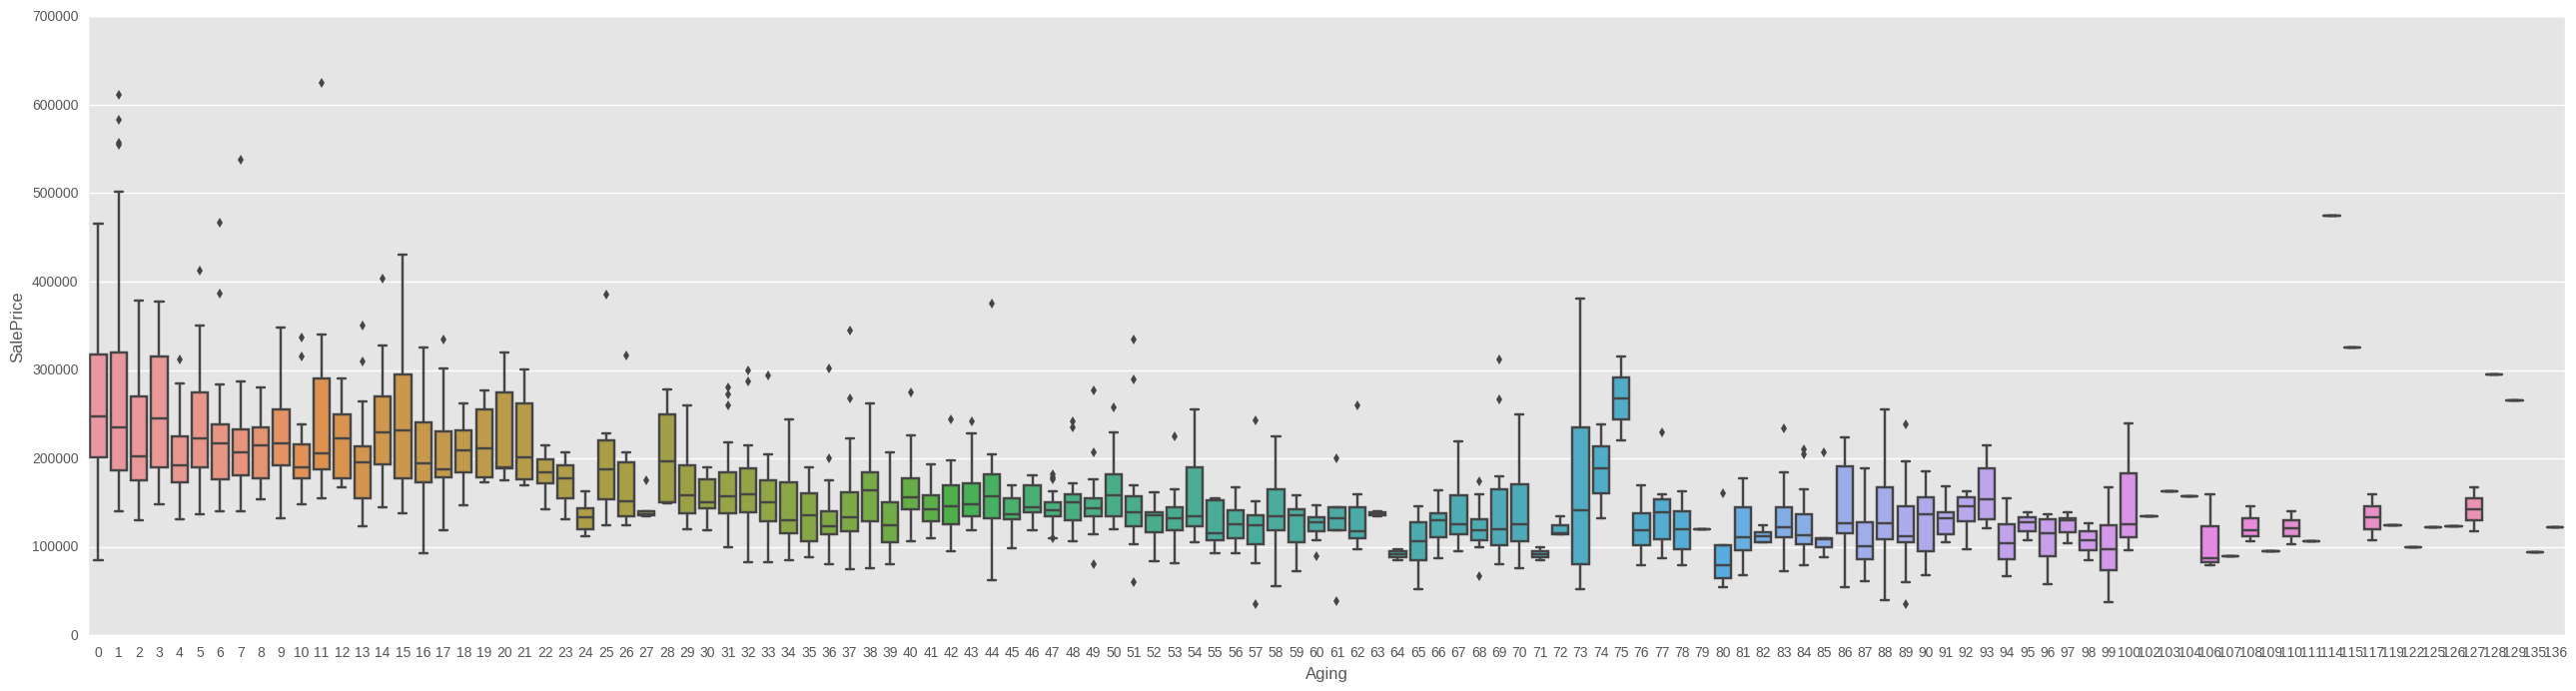

In [19]:
fig = plt.figure(figsize=(32,8))
sns.boxplot(x="Aging", y="SalePrice", data=df_train)

## Remodel Year
A new feature will compute the year between the year built and year remodel.

In [20]:
df_train["remodelAge"] = df_train["YearRemodAdd"] - df_train["YearBuilt"]

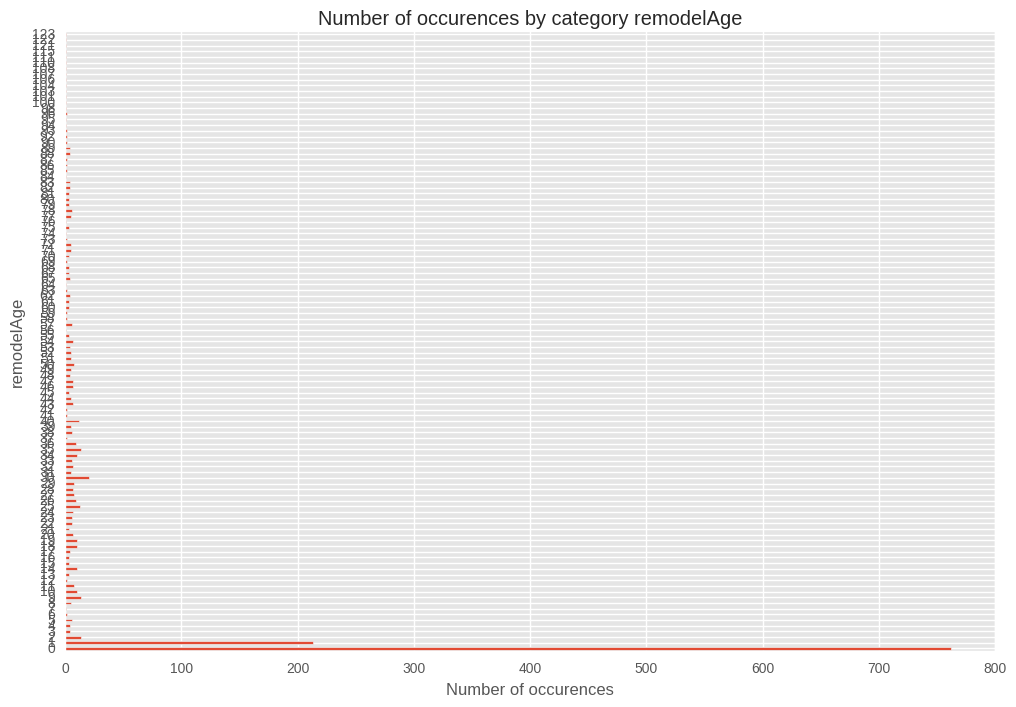

In [21]:
simple_count("remodelAge", (12,8))

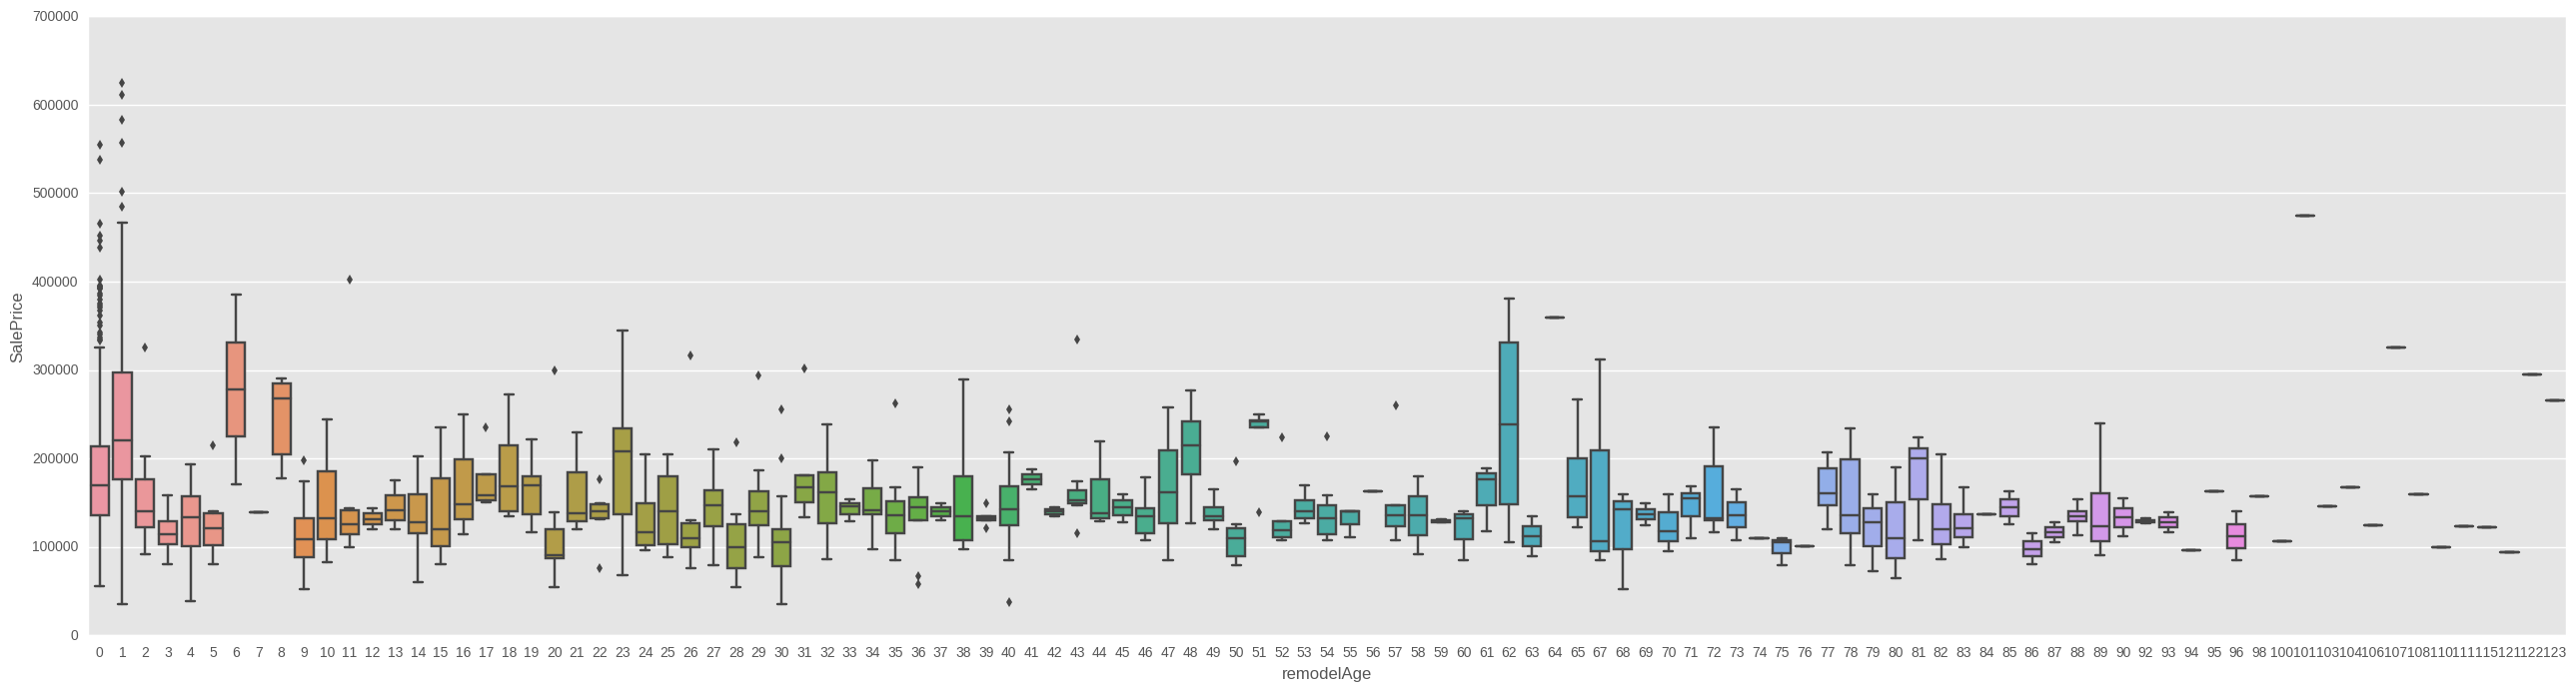

In [22]:
fig = plt.figure(figsize=(32,8))
sns.boxplot(x="remodelAge", y="SalePrice", data=df_train)

## FloorSF
A new feature will combine the square feet of two floors.

In [23]:
df_train["FloorSF"] = df_train["1stFlrSF"] + df_train["2ndFlrSF"]

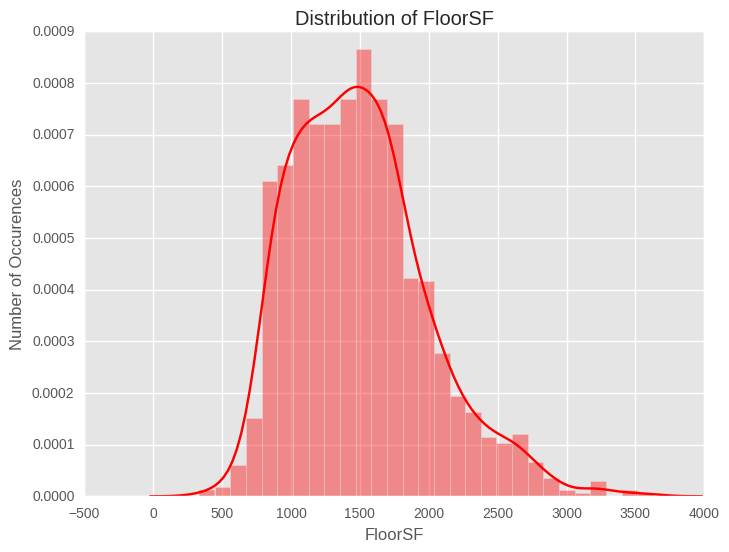

In [24]:
plot_univariate_dist(df_train, "FloorSF")

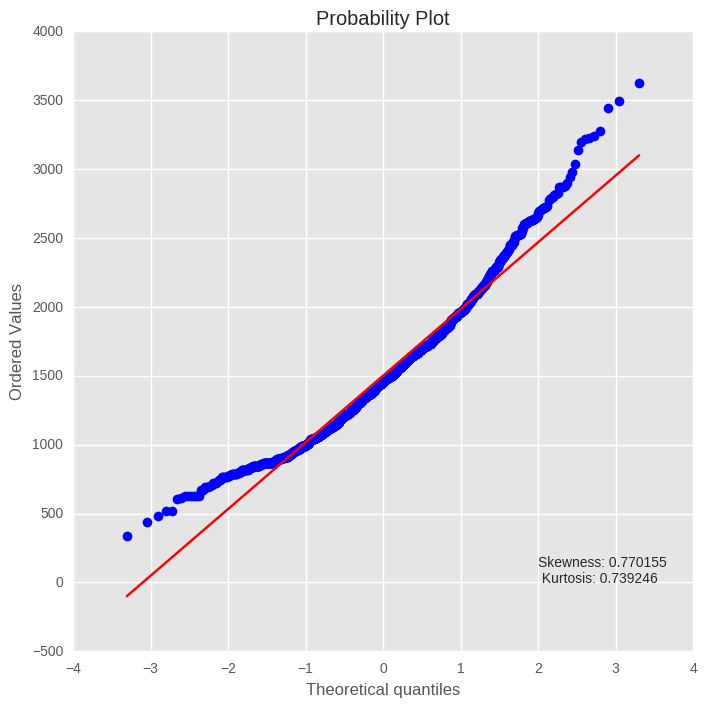

In [25]:
plot_univariate_pp(df_train, "FloorSF")

## Total area
We can combine the total area above the ground and basement together.

In [26]:
df_train["totalArea"] = df_train["GrLivArea"] + df_train["TotalBsmtSF"]

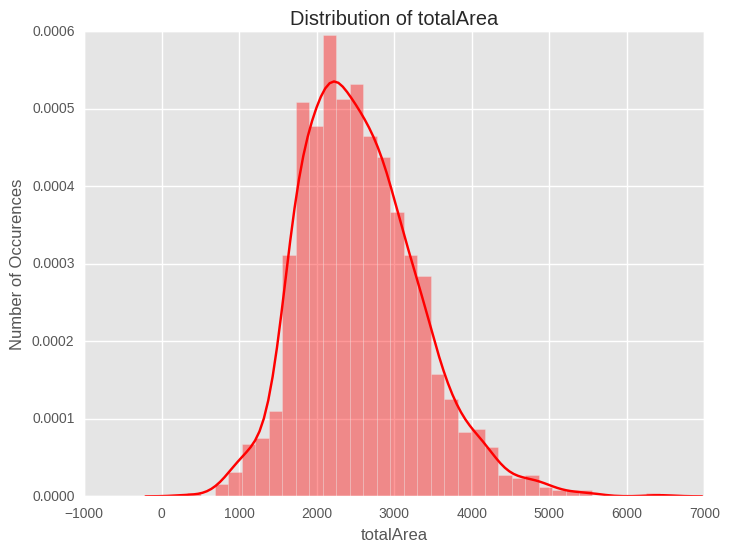

In [27]:
plot_univariate_dist(df_train, "totalArea")

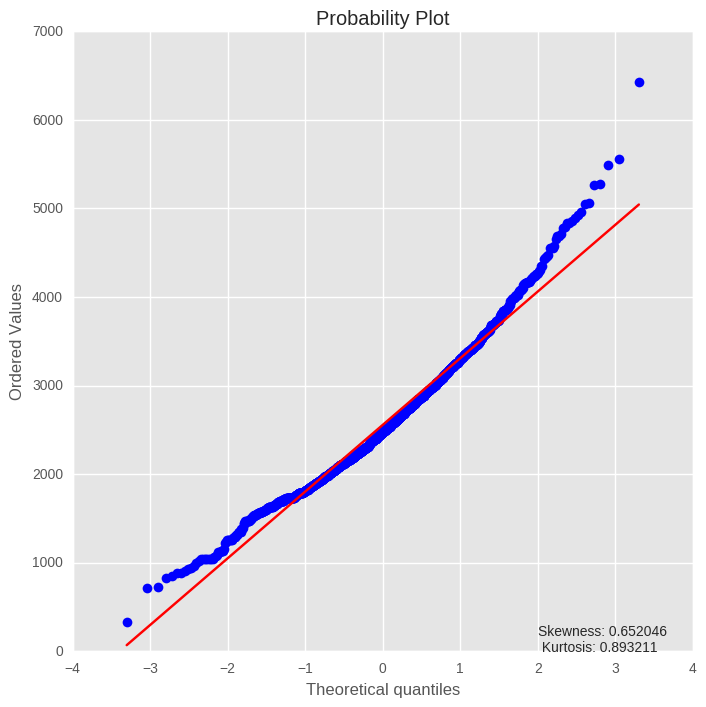

In [28]:
plot_univariate_pp(df_train, "totalArea")

## Total Grade
We can multiply Total Area and Overall Qual.

In [29]:
df_train["totalGrade"] = df_train["totalArea"] * df_train["OverallQual"]

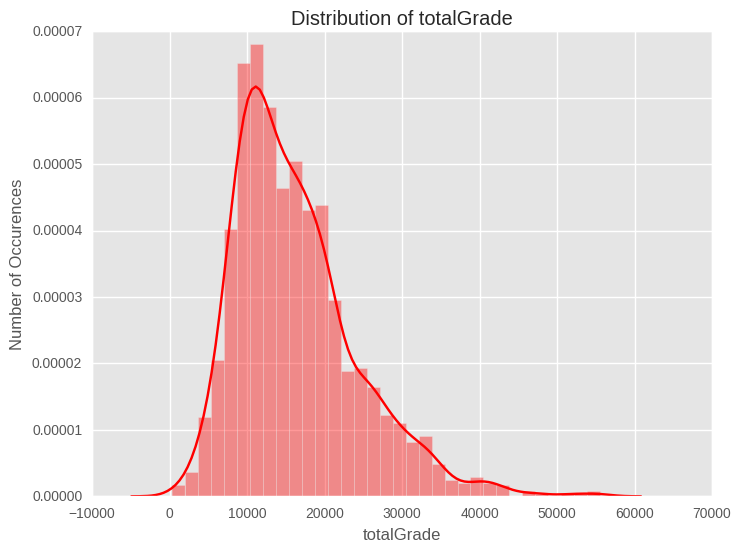

In [30]:
plot_univariate_dist(df_train, "totalGrade")

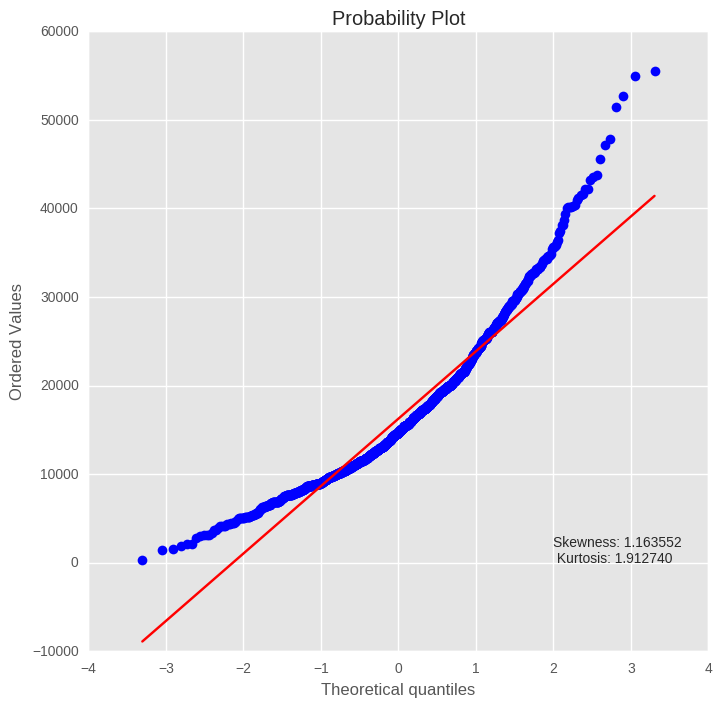

In [31]:
plot_univariate_pp(df_train, "totalGrade")

Needs to be log transformed.

## Year in Garage
The new feature can compute the difference between garage built and house built in years.

In [32]:
df_train["GarageYrBlt"].fillna(df_train["YearBuilt"]-100, inplace=True)
df_train["GarageAge"] = df_train["GarageYrBlt"] - df_train["YearBuilt"]

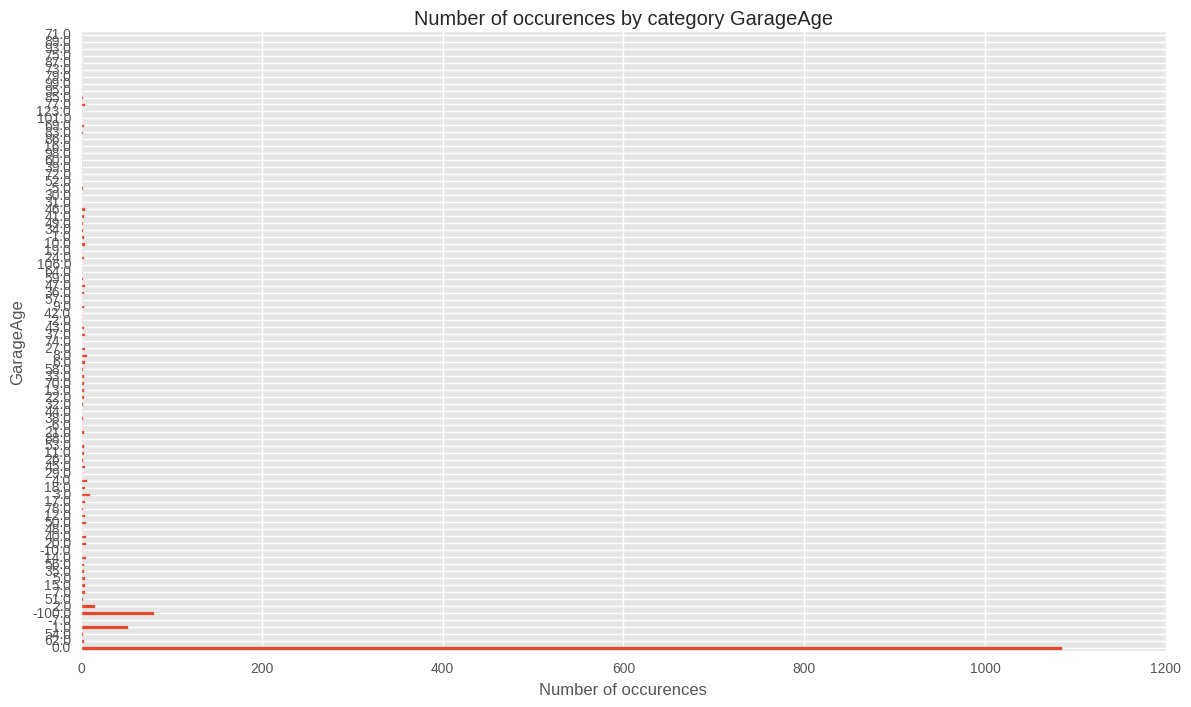

In [ ]:
simple_count("GarageAge", (14,8))

In [ ]:
simple_violin("GarageAge", (34,10))

In [ ]:
removed = ["BsmtFinSF1", "MSSubClass", "LotFrontage", "LotArea", "Alley", "LotShape", "Utilities", "LandSlope", "Condition1","Condition2","BldgType",
          "HouseStyle","2ndFlrSF", "OverallCond", "BsmtFinSF2", "BsmtUnfSF", "LowQualFinSF","BsmtFullBath", "BsmtHalfBath",
          "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
          "3SsnPorch", "PoolArea", "PoolQC", "MiscFeature", "MiscVal", "YrSold", "MSZoning", "Street",
          "LotConfig", "RoofStyle", "RoofMatl","Exterior1st", "Exterior2nd", "ExterCond", "BsmtCond",
          "BsmtExposure", "BsmtFinType2","Heating", "CentralAir", "Electrical", "Functional", "GarageQual",
          "GarageCond", "PavedDrive", "SaleType", "SaleCondition", "ScreenPorch", "Fence", "MoSold", "LandContour"]

In [ ]:
df_train = df_train.drop(removed, axis=1)

In [ ]:
qualitative = [f for f in df_train.columns if df_train.dtypes[f] == 'object']

In [ ]:
for c in qualitative:
    df_train[c] = df_train[c].astype('category')
    if df_train[c].isnull().any():
        df_train[c] = df_train[c].cat.add_categories(['MISSING'])
        df_train[c] = df_train[c].fillna('MISSING')

In [ ]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o

In [ ]:
qual = []
for q in qualitative:
    encode(df_train, q)
    qual.append(q+"_E")

## Fireplace Grade
A new feature will multiply the number of fireplaces and quality.

In [ ]:
df_train["FireplaceGrade"] = df_train["FireplaceQu_E"] * df_train["Fireplaces"]

In [ ]:
simple_count("FireplaceGrade", (8,6))

In [ ]:
simple_violin("FireplaceGrade", (6,8))

## Basement Grade
A new feature can multiple the Basement Area and quality.

In [ ]:
df_train.TotalBsmtSF.fillna(0, inplace=True)
df_train["BsmtGrade"] = df_train["BsmtQual_E"] * df_train["TotalBsmtSF"]

In [ ]:
plot_univariate_dist(df_train, "BsmtGrade")

In [ ]:
plot_univariate_pp(df_train, "BsmtGrade")

Log transform is needed.

In [ ]:
for t in ["GarageCars", "GarageArea", "MasVnrArea"]:
    df_train[t].fillna(0, inplace=True)

In [ ]:
for n in ["1stFlrSF", "GrLivArea", "BsmtGrade","TotalBsmtSF"]:
    df_train[n] = np.log1p(df_train[n].values)

In [ ]:
df_train = df_train.drop(qualitative, axis = 1)

In [ ]:
corr = df_train.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, vmax=1, square=True)

In [ ]:
Price_corr = corr["SalePrice"].sort_values()
Price_corr.plot.barh(figsize=(10,10))